# 講座の概要  
  
### ◆AutoVIML(0.1.683)についてご紹介  

## ---------------------------------------------------------  

### ◆コースの流れ
インストール ⇒ Arguments ⇒ AutoVIMLの使用方法 ⇒ 課題4つ ⇒ SIGNATEに参加

## ---------------------------------------------------------  

### ◆目的
AutoVIMLの使用ができるようになる。  
Argumentsのチューニングによりモデルの予測精度を改良できるようになる。
  
## ---------------------------------------------------------  
    
### ◆本講座の対象者  
Pythonのjupyter notebookを用いてデータセットの読込から前処理、予測モデル作成、モデルの評価まで一連の作業を経験している方  
AutoVIMLに関心がある方

In [5]:
pip show autoviml

Name: autoviml
Version: 0.1.683
Summary: Automatically Build Variant Interpretable ML models fast - now with CatBoost!
Home-page: https://github.com/AutoViML/Auto_ViML
Author: Ram Seshadri
Author-email: None
License: Apache License 2.0
Location: c:\users\hiro\anaconda3\lib\site-packages
Requires: imbalanced-learn, ipython, shap, xlrd, emoji, catboost, pandas, xgboost, nltk, seaborn, vaderSentiment, jupyter, beautifulsoup4, textblob, scikit-learn, regex, matplotlib
Required-by: 
Note: you may need to restart the kernel to use updated packages.


## -----------------------------------------------------------------------------------------------------

# AutoVIMLとは  

Link：https://github.com/AutoViML/Auto_ViML

## -----------------------------------------------------------------------------------------------------

# AutoVIMLのインストール

◆必須  
pip install autoviml

## -----------------------------------------------------------------------------------------------------

# データセットの取得

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Argumentsの学習 

train：学習用データ（DataFrame）を指定。目的変数（target）は入れたままでOK。  
target：目的変数を指定。例）"tip"  
test:テスト用データを指定。テスト用 ⇒ 目的変数必要なし、検証用 ⇒ どっちでもOK。  
sample_submission："" ⇒ 空白でOK。JupyterNotebookと同じ階層に予測結果が格納。  
hyper_param："RS" ⇒ RSでOK。例）"GS"と"RS"のみ  
feature_reduction：TrueでもFalseどちらでも可。  
scoring_parameter："" ⇒ 空白でOK。例）"f1"、"balanced_accuracy"や'neg_mean_absolute_error'もOK。  
Boosting Flag：None/False/True/CatBoostのどれかを状況に応じて選択。  
KMeans_Featurizer：True/Falseのどちらかを状況に応じて選択。  
Add_Poly：0/1/2/3のどれかを状況に応じて選択。  
Binning_Flag：True/Falseのどちらかを状況に応じて選択。  
Stacking_Flag：True/Falseのどちらかを状況に応じて選択。  
Imbalanced_Flag：True/Falseのどちらかを状況に応じて選択。  
verbose：0/1/2のどれかを選択。詳細な結果を出力するため2を推奨。

参考サイト：https://scikit-learn.org/stable/modules/model_evaluation.html

In [2]:
from autoviml.Auto_ViML import Auto_ViML

In [ ]:
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test="",
    sample_submission='',
    hyper_param='RS',
    feature_reduction=True,
    scoring_parameter='logloss',
    Boosting_Flag=None,
    KMeans_Featurizer=False,
    Add_Poly=0,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

# Auto_VIMLの実行

In [6]:
tips.shape

(244, 7)

In [7]:
num = int(0.9*tips.shape[0])
train = tips[:num]
test = tips[num:]
target = "tip"

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (219, 7)
    Training Set Memory Usage = 0.01 MB
Test Set Shape = (25, 7)
    Test Set Memory Usage = 0.00 MB
Single_Label Target: ['tip']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    6 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
    Completed Label Encoding and Filling of Missing Values f

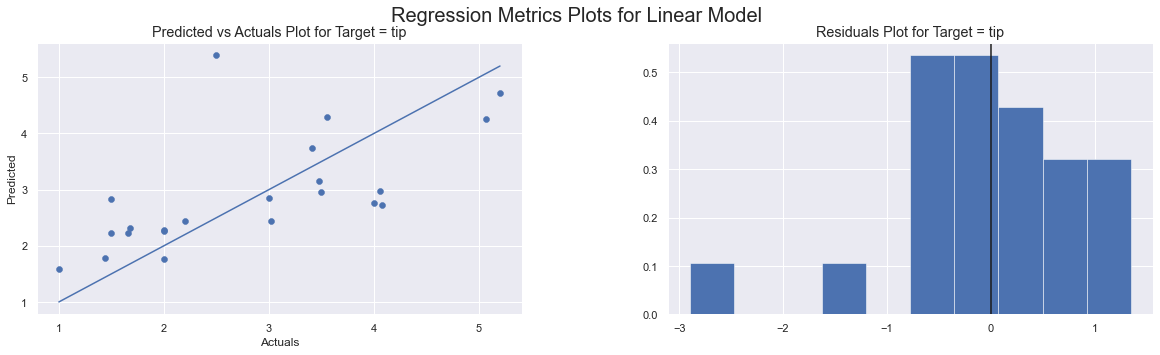

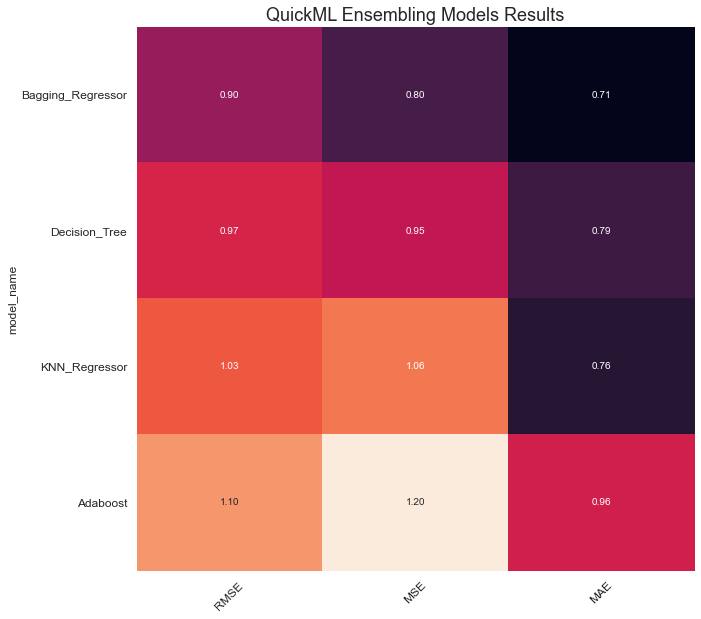

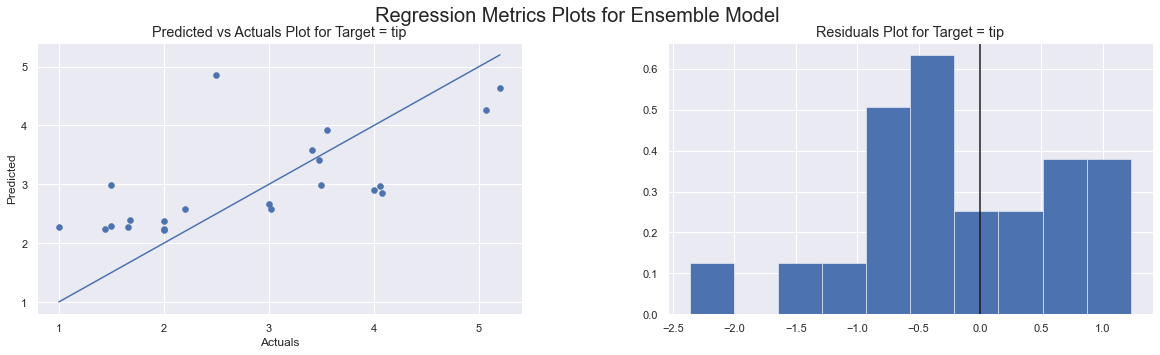

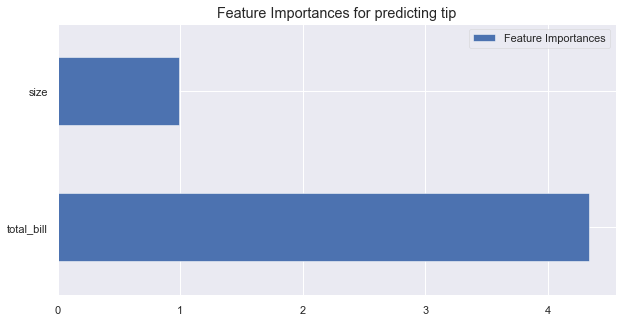

In [8]:
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='RS',
    feature_reduction=True,
    scoring_parameter='',
    Boosting_Flag=None,
    KMeans_Featurizer=False,
    Add_Poly=0,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

In [9]:
test_ans = test["tip"]
import pandas as pd
pred = pd.read_csv("./tip/tip_Regression_submission.csv")

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("RMSE:",np.sqrt(mean_squared_error(test_ans,pred)))

RMSE: 1.0555127262181445


# Drill  

#### 課題1:hyper_param='GS'に変更

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (219, 7)
    Training Set Memory Usage = 0.01 MB
Test Set Shape = (25, 7)
    Test Set Memory Usage = 0.00 MB
Single_Label Target: ['tip']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    6 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
    Completed Label Encoding and Filling of Missing Value

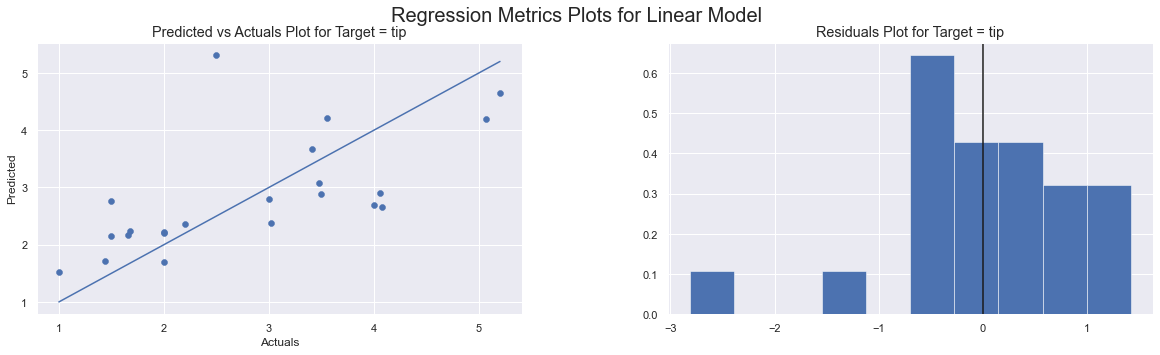

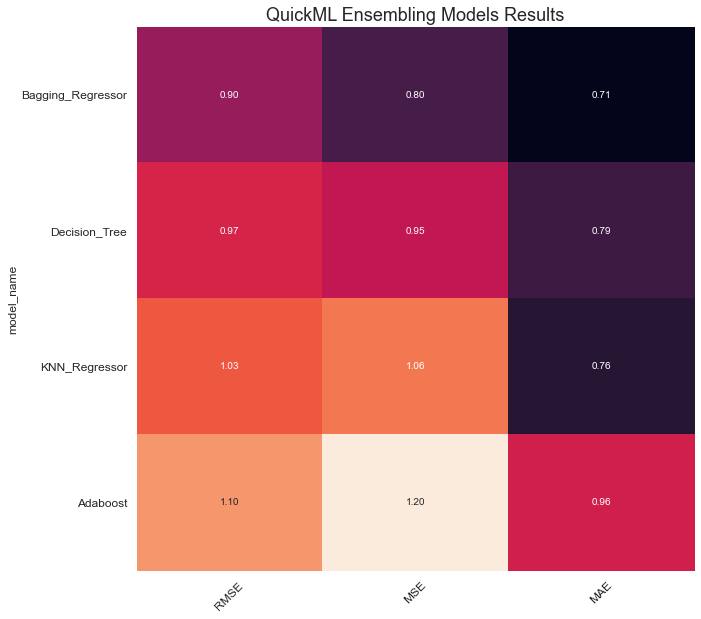

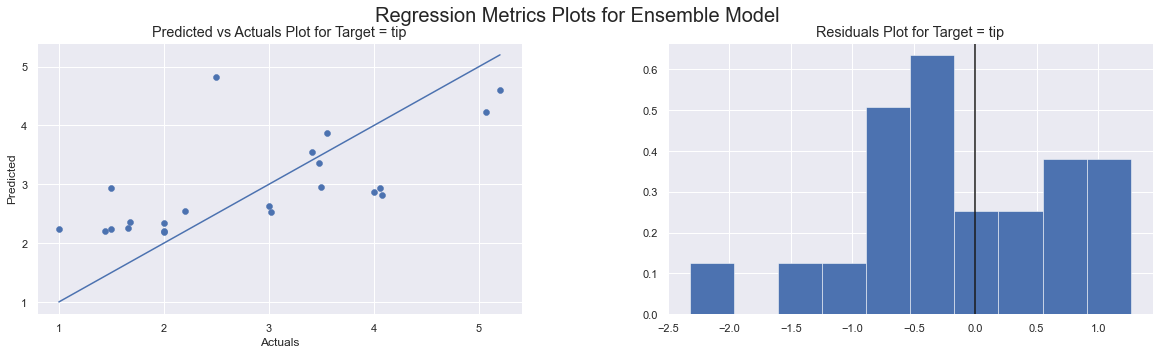

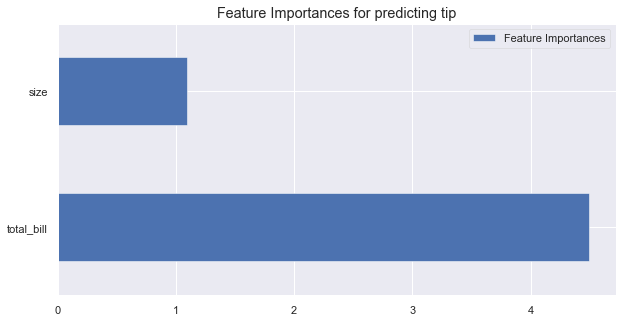

In [11]:
from autoviml.Auto_ViML import Auto_ViML
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='GS',
    feature_reduction=True,
    scoring_parameter='',
    Boosting_Flag=None,
    KMeans_Featurizer=False,
    Add_Poly=0,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

#### 課題2:feature_reduction=Falseに変更

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (219, 7)
    Training Set Memory Usage = 0.01 MB
Test Set Shape = (25, 7)
    Test Set Memory Usage = 0.00 MB
Single_Label Target: ['tip']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    6 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
    Completed Label Encoding and Filling of Missing Value

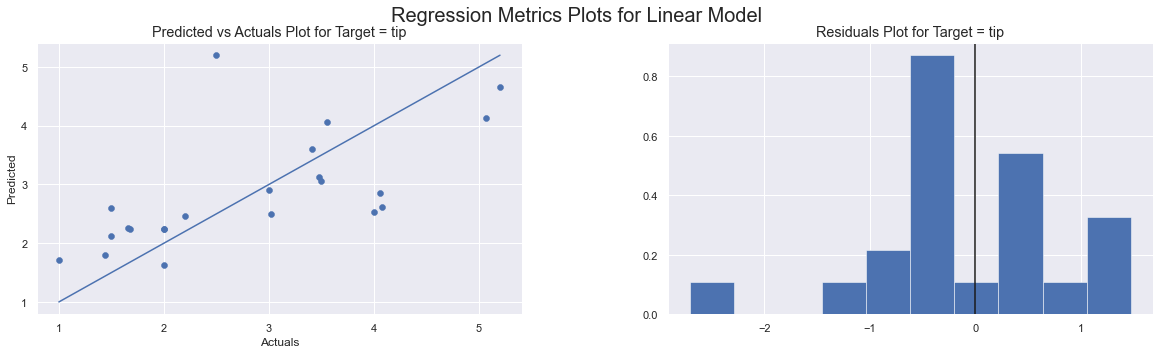

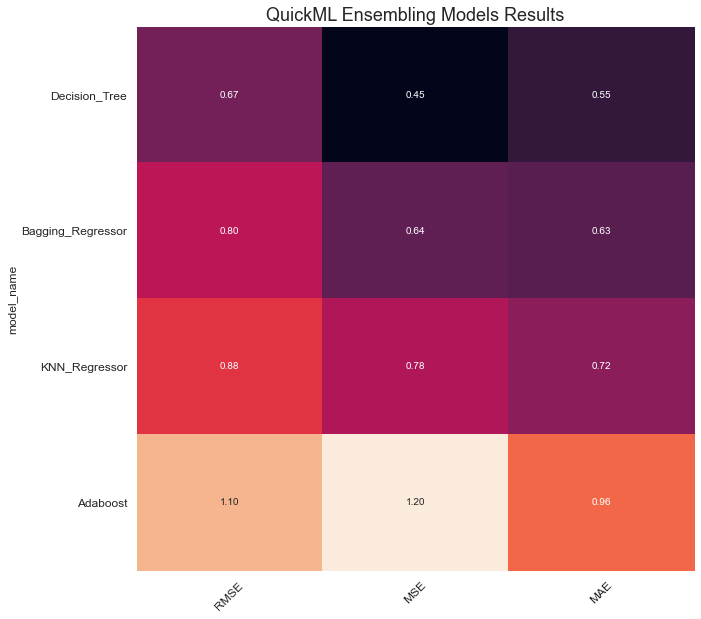

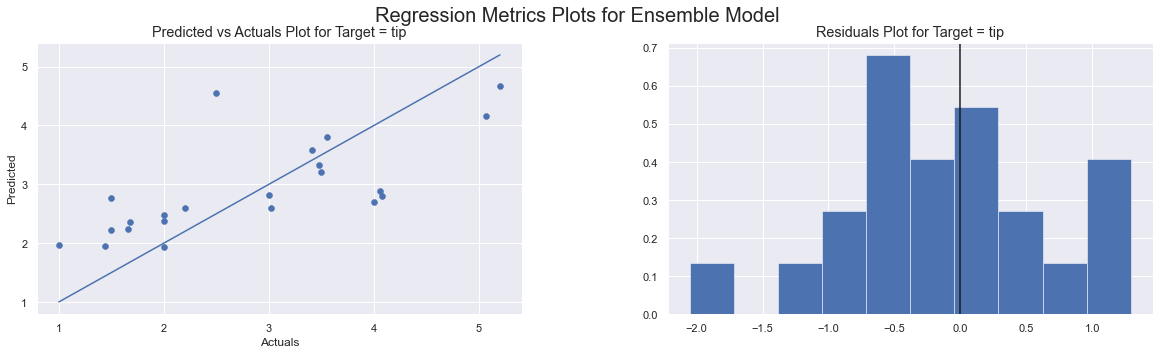

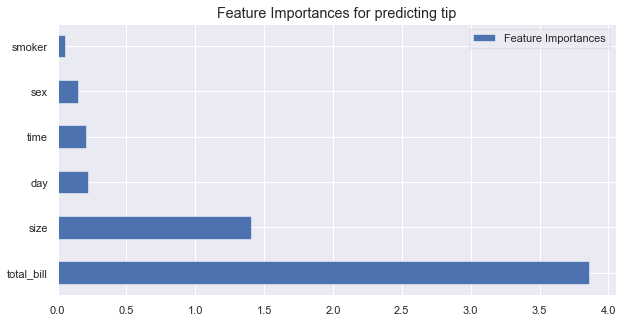

In [12]:
from autoviml.Auto_ViML import Auto_ViML
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='GS',
    feature_reduction=False,
    scoring_parameter='',
    Boosting_Flag=None,
    KMeans_Featurizer=False,
    Add_Poly=0,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

#### 課題3:scoring_parameter="neg_mean_squared_error"に変更

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (219, 7)
    Training Set Memory Usage = 0.01 MB
Test Set Shape = (25, 7)
    Test Set Memory Usage = 0.00 MB
Single_Label Target: ['tip']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    6 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
    Completed Label Encoding and Filling of Missing Value

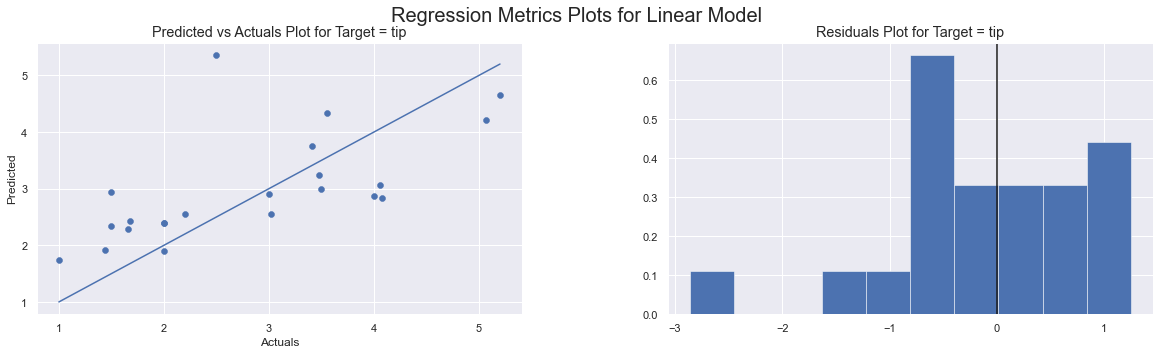

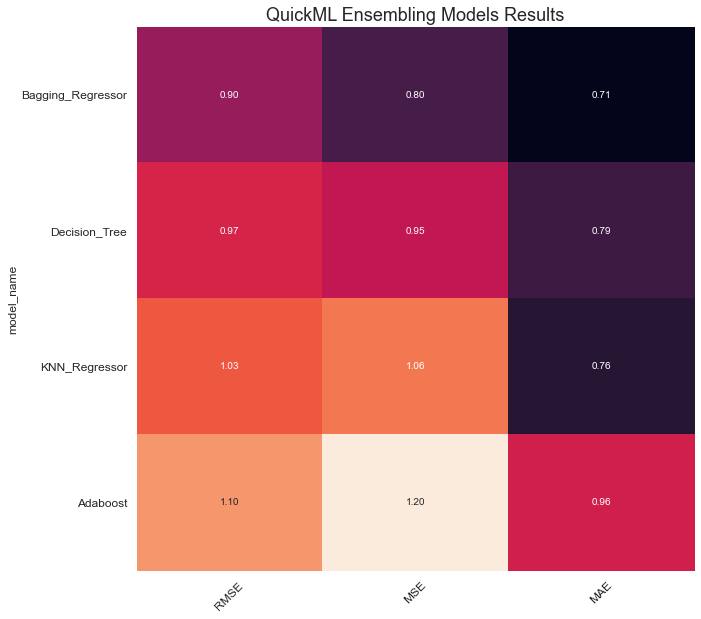

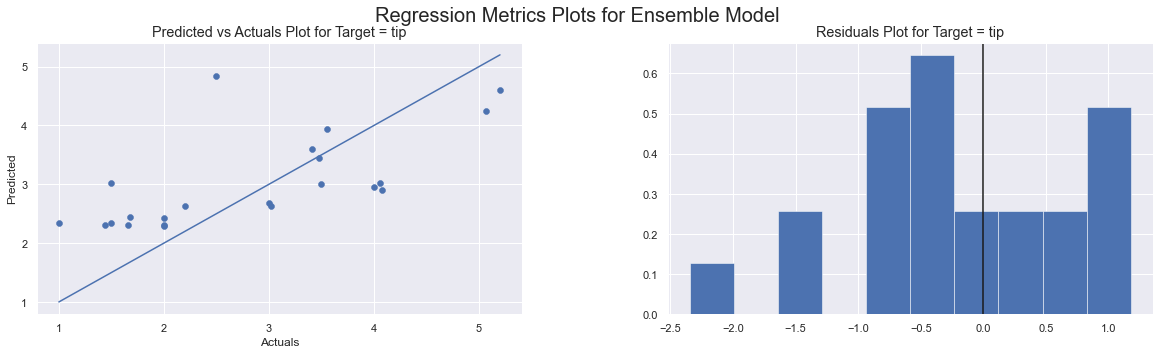

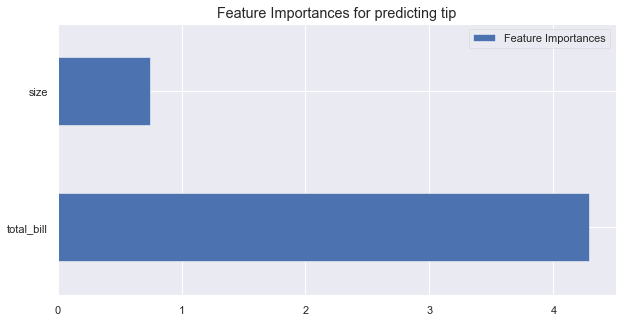

In [13]:
from autoviml.Auto_ViML import Auto_ViML
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='GS',
    feature_reduction=True,
    scoring_parameter="neg_mean_squared_error",
    Boosting_Flag=None,
    KMeans_Featurizer=False,
    Add_Poly=0,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

#### 課題4:Boosting_Flag=”CatBoost”に変更

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (219, 7)
    Training Set Memory Usage = 0.01 MB
Test Set Shape = (25, 7)
    Test Set Memory Usage = 0.00 MB
Single_Label Target: ['tip']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    6 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
    Completed Label Encoding and Filling of Missing Value

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.017096
0:	learn: 1.4149785	test: 1.2057218	best: 1.2057218 (0)	total: 142ms	remaining: 7m 5s


500:	learn: 0.7841945	test: 0.8656838	best: 0.8305987 (321)	total: 476ms	remaining: 2.37s
1000:	learn: 0.6319200	test: 0.9563813	best: 0.8305987 (321)	total: 855ms	remaining: 1.71s
1500:	learn: 0.5377643	test: 0.9881850	best: 0.8305987 (321)	total: 1.23s	remaining: 1.23s
2000:	learn: 0.4719985	test: 1.0196820	best: 0.8305987 (321)	total: 1.58s	remaining: 790ms
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 0.8305986658
bestIteration = 321

Shrink model to first 322 iterations.
    Actual training time (in seconds): 2
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation RMSE Score = 0.8306
    CatBoost Best Parameters for Model: Iterations = 321, learning_rate = 0.02
########################################################
CatBoost Model Prediction Results on Held Out CV Data Set:
Regression Plots completed in 0.033 seconds
    MAE = 0.6434
    MAPE = 30%
    RMSE = 0.8306
    MAE as % std dev of Actuals = 54.2%
    Normaliz

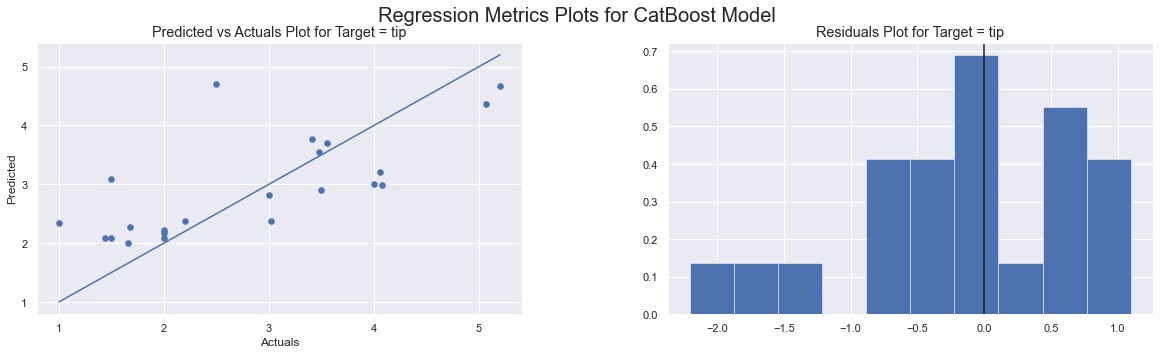

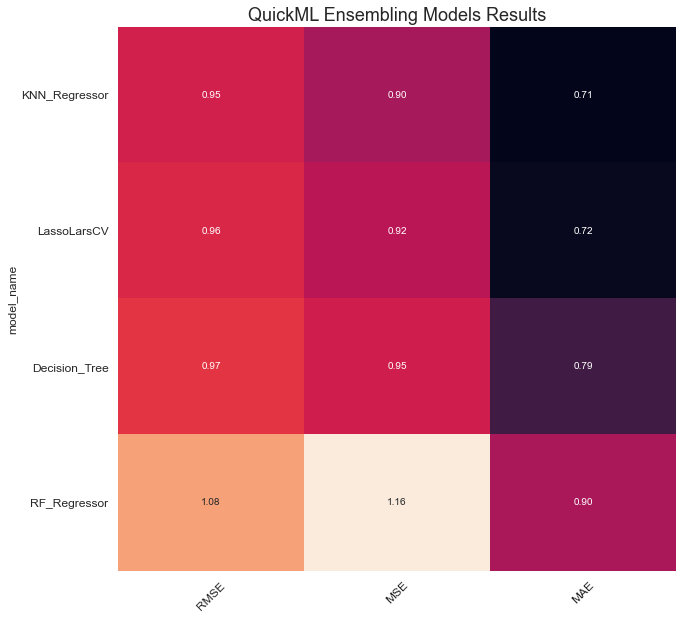

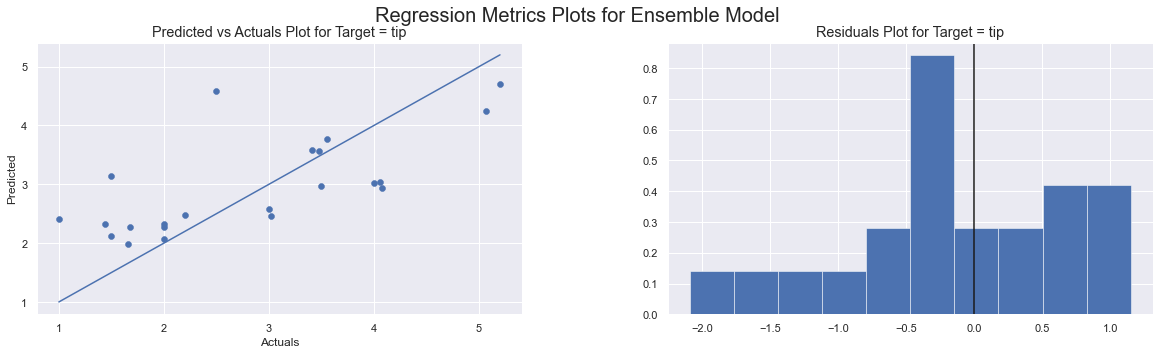

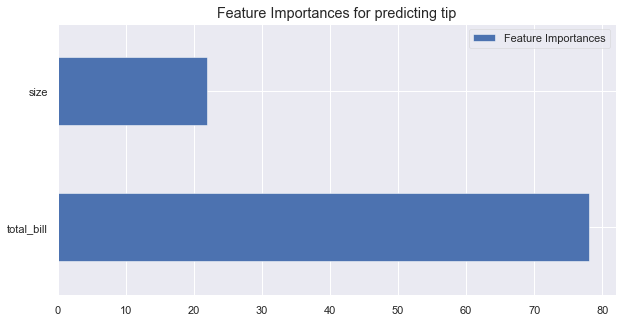

In [14]:
from autoviml.Auto_ViML import Auto_ViML
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='GS',
    feature_reduction=True,
    scoring_parameter="neg_mean_squared_error",
    Boosting_Flag="CatBoost",
    KMeans_Featurizer=False,
    Add_Poly=0,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

#### 課題5:KMeans_Featurizer=Trueに変更

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (219, 7)
    Training Set Memory Usage = 0.01 MB
Test Set Shape = (25, 7)
    Test Set Memory Usage = 0.00 MB
Single_Label Target: ['tip']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    6 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
    Completed Label Encoding and Filling of Missing Value

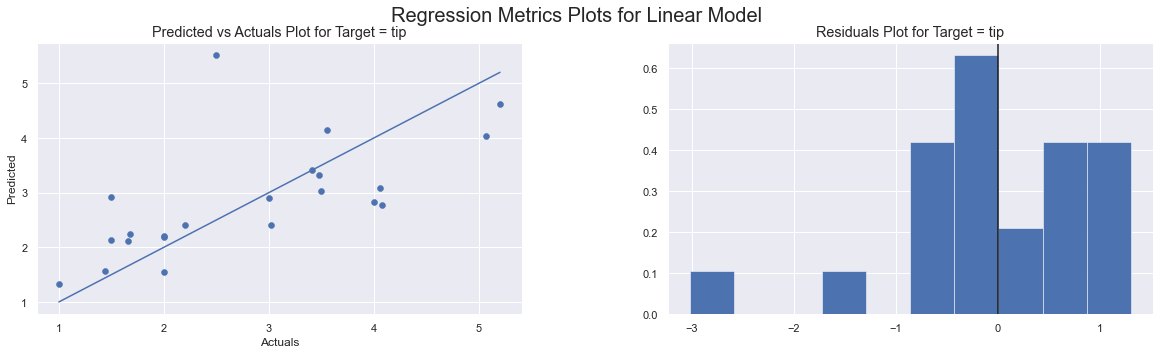

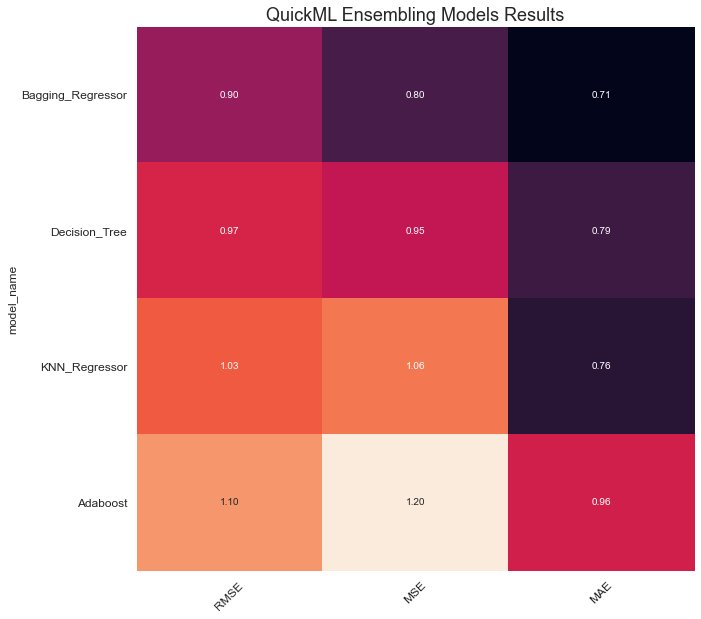

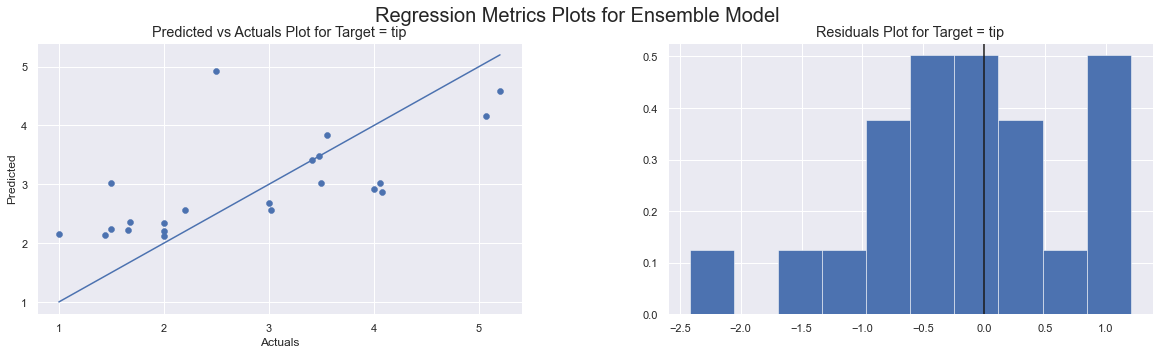

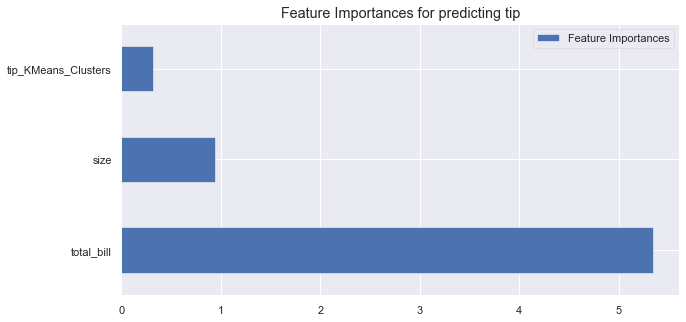

In [15]:
from autoviml.Auto_ViML import Auto_ViML
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='GS',
    feature_reduction=True,
    scoring_parameter="neg_mean_squared_error",
    Boosting_Flag=None,
    KMeans_Featurizer=True,
    Add_Poly=0,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

#### 課題6:Add_Poly=3に変更

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (219, 7)
    Training Set Memory Usage = 0.01 MB
Test Set Shape = (25, 7)
    Test Set Memory Usage = 0.00 MB
Single_Label Target: ['tip']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    6 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
    Completed Label Encoding and Filling of Missing Value

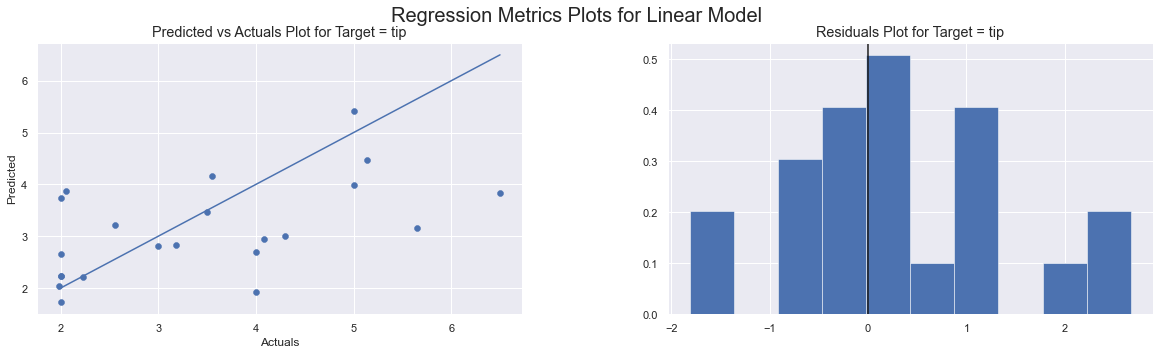

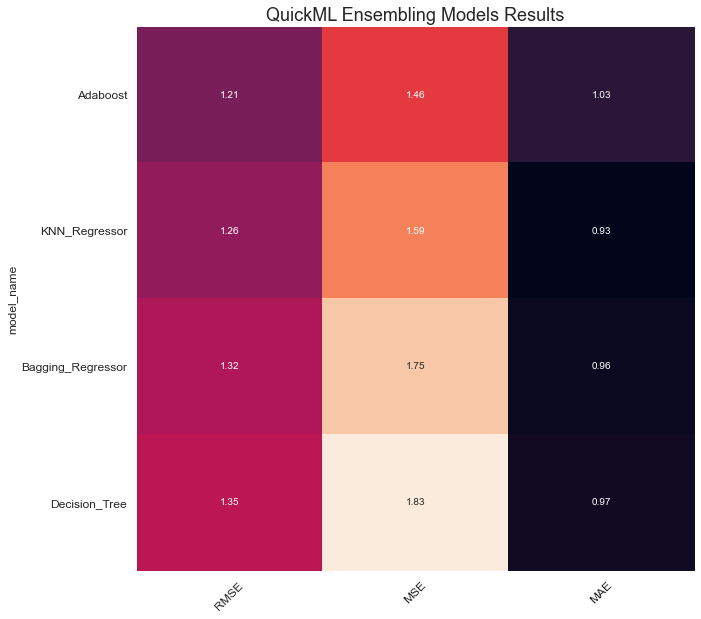

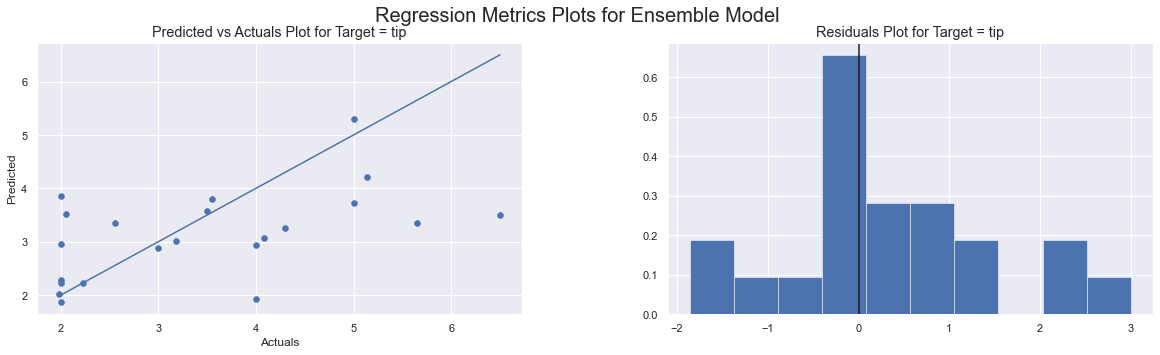

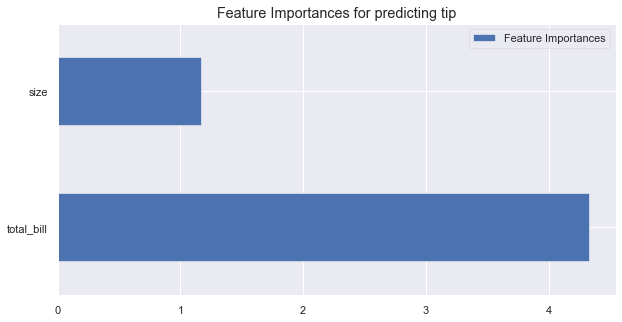

In [16]:
from autoviml.Auto_ViML import Auto_ViML
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='GS',
    feature_reduction=True,
    scoring_parameter="neg_mean_squared_error",
    Boosting_Flag=None,
    KMeans_Featurizer=False,
    Add_Poly=3,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

# Test

(課題)  
Seabornの中にあるDiamondsのデータセットを使用し、Auto_VIMLより回帰モデルを作成。  
取得した予測値と実測値の誤差をRMSEより算出。

In [17]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.00,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.10,55.00,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.80,60.00,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.00,58.00,2757,6.15,6.12,3.74


# Answer

In [18]:
num = int(0.9*diamonds.shape[0])
train = diamonds[:num]
test = diamonds[num:]
target = "price"

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (48546, 10)
    Training Set Memory Usage = 2.73 MB
Test Set Shape = (5394, 10)
    Test Set Memory Usage = 0.30 MB
Single_Label Target: ['price']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    9 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data 

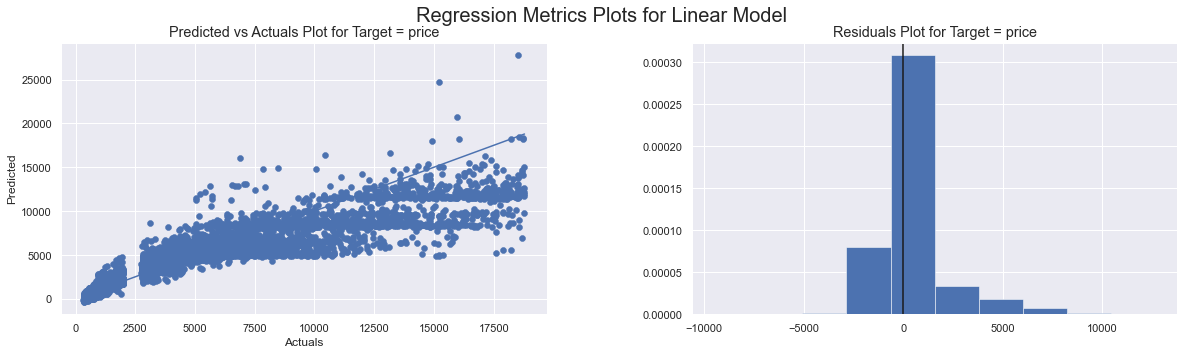

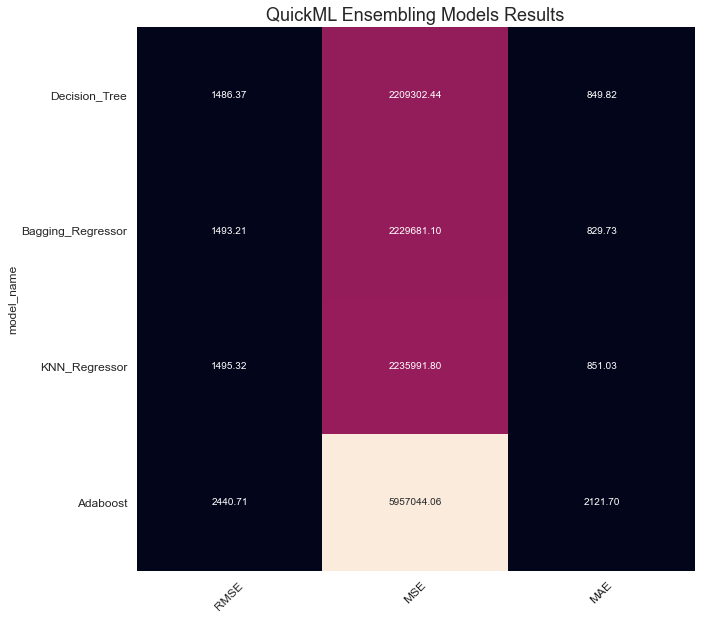

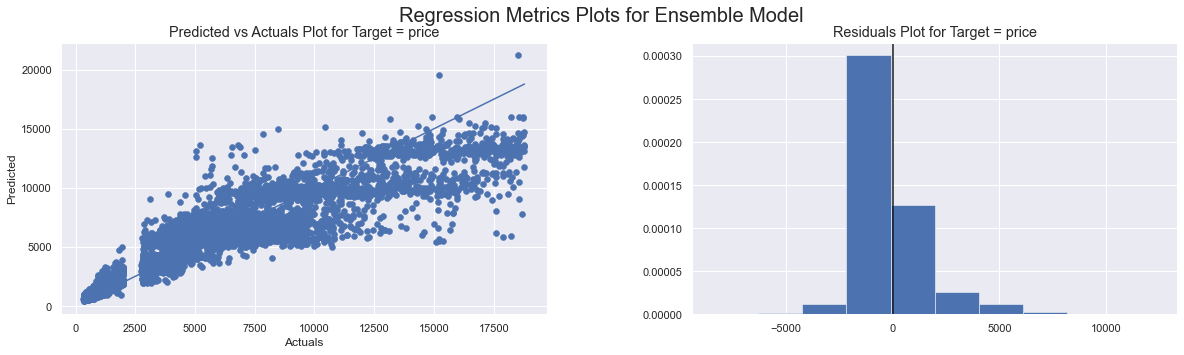

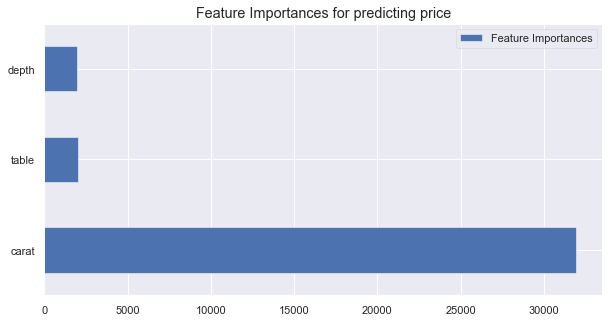

In [19]:
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='RS',
    feature_reduction=True,
    scoring_parameter='',
    Boosting_Flag=None,
    KMeans_Featurizer=False,
    Add_Poly=0,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

In [20]:
test_ans = test["price"]
import pandas as pd
pred = pd.read_csv("./price/price_Regression_submission.csv")

import numpy as np
from sklearn.metrics import mean_squared_error
print("RMSE:",np.sqrt(mean_squared_error(test_ans,pred)))

RMSE: 812.9731633293067


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (48546, 10)
    Training Set Memory Usage = 2.73 MB
Test Set Shape = (5394, 10)
    Test Set Memory Usage = 0.30 MB
Single_Label Target: ['price']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    9 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data 

Time taken = 5 seconds
Based on trying multiple models, Best type of algorithm for this data set is Decision_Tree
    Displaying results of weighted average ensemble of 5 regressors
#############################################################################
Regression Plots completed in 0.033 seconds
    MAE = 920.5927
    MAPE = 30%
    RMSE = 1530.1388
    MAE as % std dev of Actuals = 22.1%
    Normalized RMSE (% of MinMax of Actuals) = 8%
    Normalized RMSE (% of Std Dev of Actuals) = 37%
After multiple models, Ensemble Model Results:
    RMSE Score = 1530.13879
#############################################################################
Ensembling Models is better than Single Model for this data set.
    Time taken for this Target (in seconds) = 61
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actu

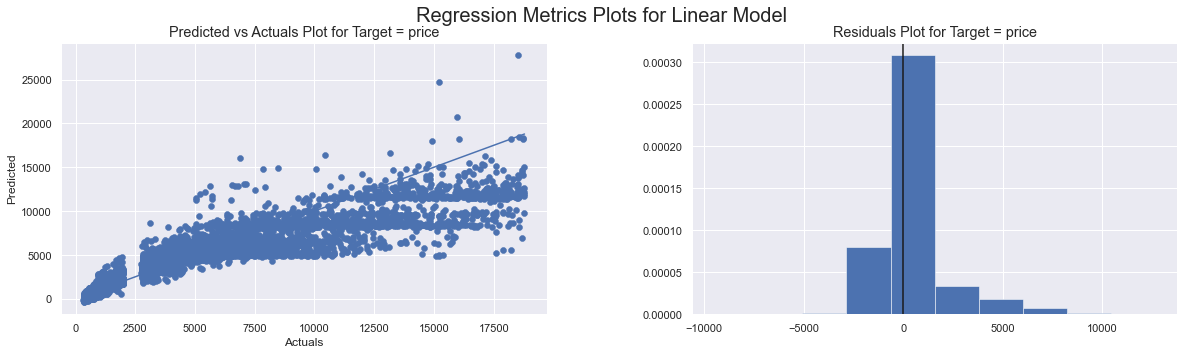

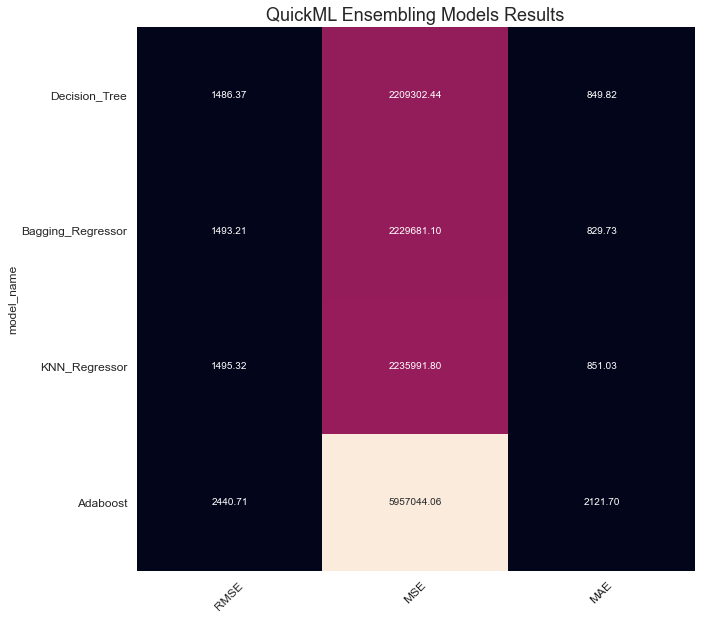

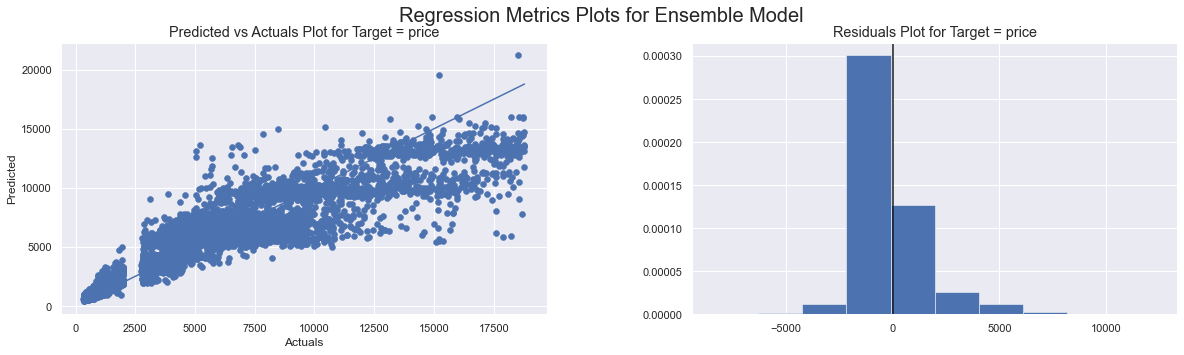

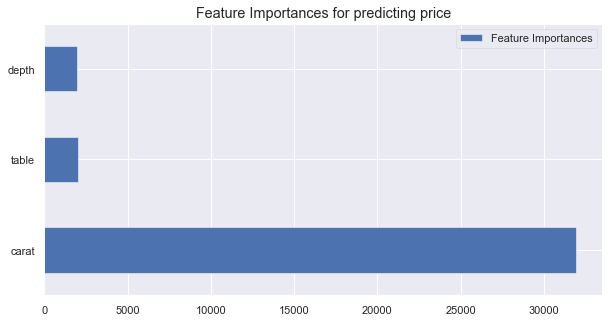

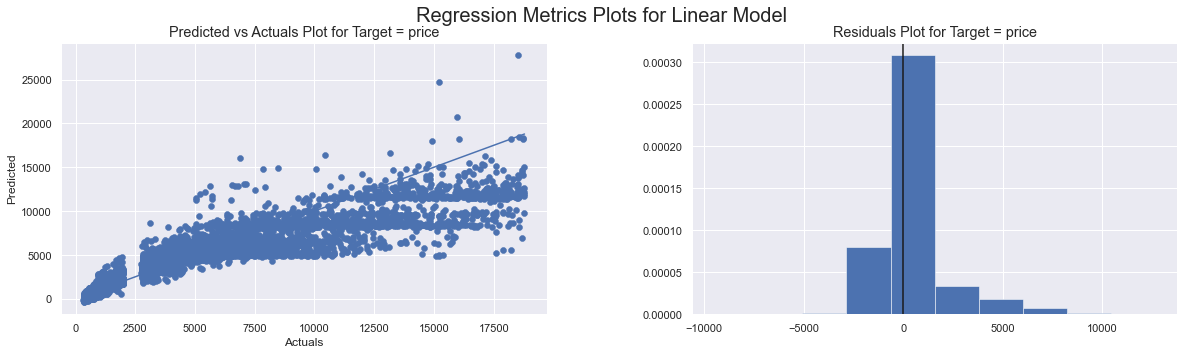

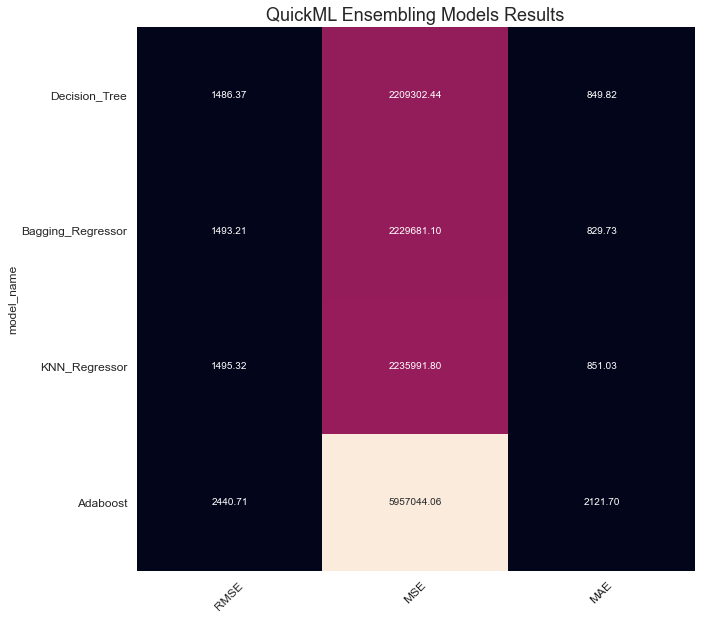

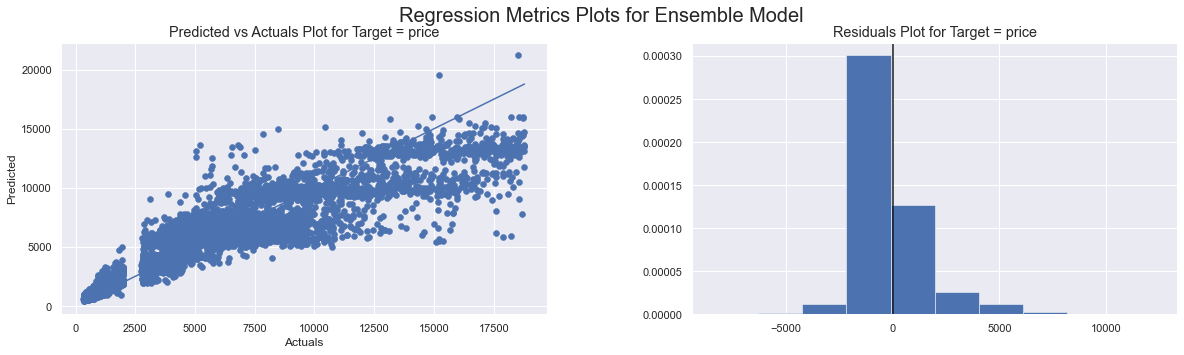

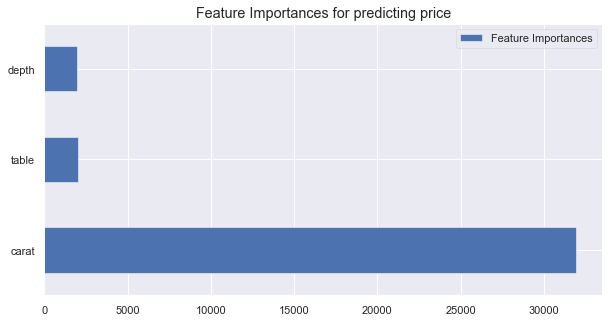

In [21]:
rmse = []
for hp in ["RS","GS"]:
    model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param=hp,
    feature_reduction=True,
    scoring_parameter='',
    Boosting_Flag=None,
    KMeans_Featurizer=False,
    Add_Poly=0,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
    )
    test_ans = test["price"]
    import pandas as pd
    pred = pd.read_csv("./price/price_Regression_submission.csv")

    import numpy as np
    from sklearn.metrics import mean_squared_error
    print("RMSE:",np.sqrt(mean_squared_error(test_ans,pred)))
    rmse.append(np.sqrt(mean_squared_error(test_ans,pred)))
    
print("RMSE:",rmse)

参考サイト：https://www.google.com/search?q=%E3%83%80%E3%82%A4%E3%83%A4%E3%83%A2%E3%83%B3%E3%83%89+%E3%83%86%E3%83%BC%E3%83%96%E3%83%AB&rlz=1C1QABZ_jaJP921JP937&sxsrf=AOaemvKfyrVtMC6HmX48XRNZrn7rgn_3EA:1632646588313&source=lnms&tbm=isch&sa=X&sqi=2&ved=2ahUKEwjX_sG_opzzAhVuDjQIHUV4AwIQ_AUoAnoECAEQBA&biw=1024&bih=996&dpr=1.25

# データセットの取得

In [5]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic = titanic.drop("alive",axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.00,S,Second,man,True,NaN,Southampton,True
887,1,1,female,19.00,0,0,30.00,S,First,woman,False,B,Southampton,True
888,0,3,female,nan,1,2,23.45,S,Third,woman,False,NaN,Southampton,False
889,1,1,male,26.00,0,0,30.00,C,First,man,True,C,Cherbourg,True


# 二値分類モデルの作成

In [6]:
import pandas as pd
titanic = pd.get_dummies(titanic)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (801, 29)
    Training Set Memory Usage = 0.05 MB
Test Set Shape = (90, 29)
    Test Set Memory Usage = 0.01 MB
Single_Label Target: ['survived']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:     493  ->   61.5%
           1:     308  ->   38.5%
    Target survived is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    28 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.018119
0:	learn: 0.8263889	test: 0.7654321	best: 0.7654321 (0)	total: 155ms	remaining: 7m 43s


500:	learn: 0.8958333	test: 0.8148148	best: 0.8271605 (482)	total: 922ms	remaining: 4.6s
1000:	learn: 0.9472222	test: 0.8641975	best: 0.8641975 (933)	total: 1.68s	remaining: 3.35s
1500:	learn: 0.9708333	test: 0.8641975	best: 0.8641975 (933)	total: 2.45s	remaining: 2.45s
2000:	learn: 0.9763889	test: 0.8641975	best: 0.8765432 (1522)	total: 3.21s	remaining: 1.6s
2500:	learn: 0.9819444	test: 0.8641975	best: 0.8765432 (1522)	total: 4.04s	remaining: 807ms
2999:	learn: 0.9861111	test: 0.8641975	best: 0.8765432 (1522)	total: 4.82s	remaining: 0us

bestTest = 0.8765432099
bestIteration = 1522

Shrink model to first 1523 iterations.
    Actual training time (in seconds): 5
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation logloss = 0.8765432098765432
    CatBoost Best Parameters for Model: Iterations = 1522, learning_rate = 0.02
Finding Best Threshold for Highest F1 Score...
    Using threshold=0.5. However, 0.356 provides better F1=0.84 for rare class

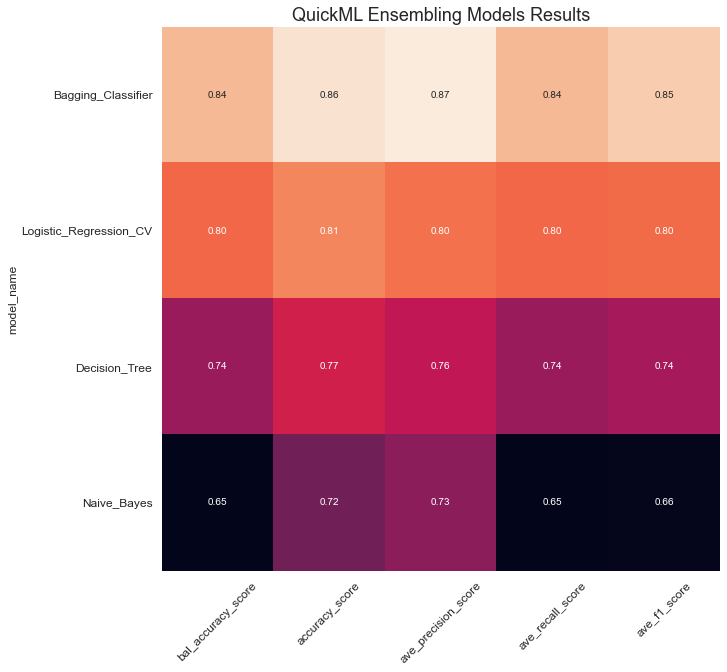

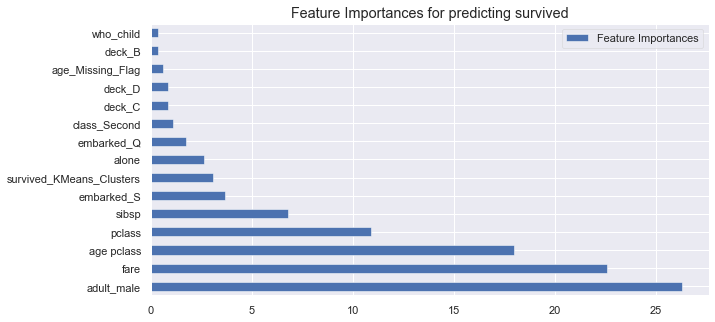

In [7]:
num = int(0.9*titanic.shape[0])
train = titanic[:num]
test = titanic[num:]
target = "survived"

model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='RS',
    feature_reduction=True,
    scoring_parameter='',
    Boosting_Flag="CatBoost",
    KMeans_Featurizer=True,
    Add_Poly=3,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

In [8]:
test_ans = test["survived"]
import pandas as pd
pred = pd.read_csv("./survived/survived_Binary_Classification_submission.csv")

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_ans,pred)
confusion_matrix

array([[48,  8],
       [ 9, 25]], dtype=int64)

In [11]:
test_ans.value_counts()

0    56
1    34
Name: survived, dtype: int64

In [12]:
from sklearn.metrics import f1_score
f1_score(test_ans,pred,pos_label=0)

0.8495575221238938

In [ ]:
num = int(0.9*titanic.shape[0])
train = titanic[:num]
test = titanic[num:]
target = "survived"

model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='RS',
    feature_reduction=True,
    scoring_parameter='',
    Boosting_Flag="CatBoost",
    KMeans_Featurizer=True,
    Add_Poly=3,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

test_ans = test["survived"]
import pandas as pd
pred = pd.read_csv("./survived/survived_Binary_Classification_submission.csv")

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_ans,pred)
print(confusion_matrix)

print(test_ans.value_counts())

from sklearn.metrics import f1_score
print("F1スコア：",f1_score(test_ans,pred,pos_label=0))

# Test

(課題)  
Scikit-Learnの中にあるIrisデータセットを使用し、Auto_VIMLより分類モデルの作成。  
混同行列の出力。  

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
X = pd.DataFrame(iris["data"],columns=iris["feature_names"])
y = pd.DataFrame(iris["target"],columns=["target"])
iris = pd.concat([X,y],axis=1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Answer

In [2]:
import numpy as np
iris = iris.sample(frac=1,random_state=0)
num = int(0.9*iris.shape[0])
train = iris[:num]
test = iris[num:]
target = "target"

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (135, 5)
    Training Set Memory Usage = 0.01 MB
Test Set Shape = (15, 5)
    Test Set Memory Usage = 0.00 MB
Single_Label Target: ['target']

################ Multi_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
       Class  -> Counts -> Percent
           0:      45  ->   33.3%
           1:      44  ->   32.6%
           2:      46  ->   34.1%
    Target target is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    4 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID o

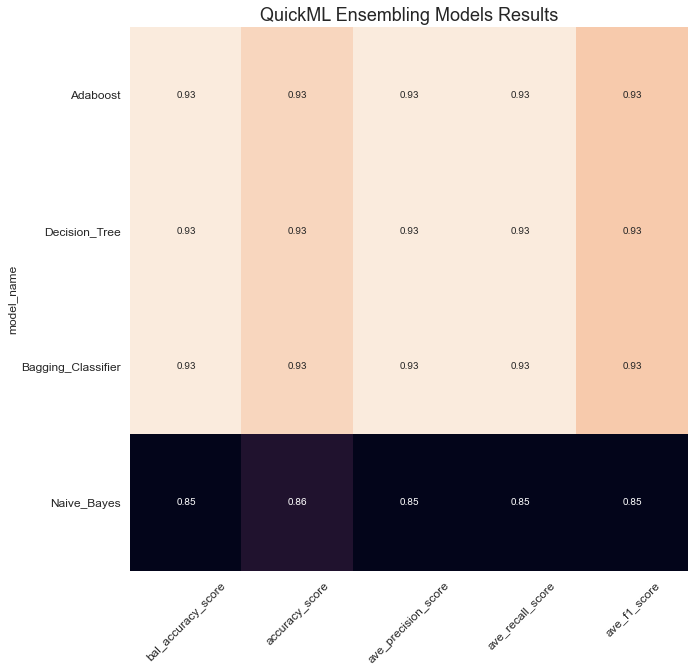

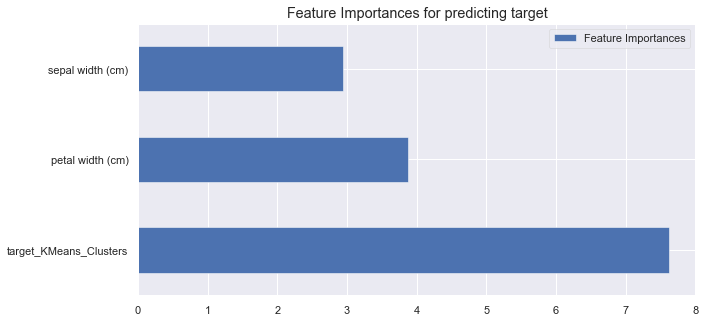

In [6]:
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='RS',
    feature_reduction=True,
    scoring_parameter='',
    Boosting_Flag=None,
    KMeans_Featurizer=True,
    Add_Poly=3,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

In [8]:
test_ans = test["target"]
import pandas as pd
pred = pd.read_csv("./target/target_Multi_Classification_submission.csv")

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_ans,pred)
print(confusion_matrix)

print(test_ans.value_counts())

[[5 0 0]
 [0 5 1]
 [0 0 4]]
1    6
0    5
2    4
Name: target, dtype: int64


# コンペの参加

公式ページ：https://signate.jp/

# データの取得

公式ページ：https://signate.jp/competitions/113

In [10]:
import pandas as pd
train = pd.read_csv("./train.tsv",sep="\t")
train = train.iloc[:,1:]
train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,2,4,sep,sun,92.40,105.80,758.10,9.90,16.00,45,1.80,0.00,0.00
1,7,4,aug,sun,91.60,181.30,613.00,7.60,19.30,61,4.90,0.00,0.00
2,7,4,sep,fri,92.10,99.00,745.30,9.60,19.80,47,2.70,0.00,1.72
3,7,4,aug,fri,94.80,227.00,706.70,12.00,23.30,34,3.10,0.00,0.00
4,4,3,sep,mon,91.60,108.40,764.00,6.20,9.80,86,1.80,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,4,4,apr,fri,83.00,23.30,85.30,2.30,16.70,20,3.10,0.00,0.00
254,6,5,aug,thu,95.20,131.70,578.80,10.40,27.40,22,4.00,0.00,0.90
255,6,5,aug,wed,96.00,127.10,570.50,16.50,23.40,33,4.50,0.00,2.51
256,2,5,aug,fri,93.90,135.70,586.70,15.10,23.50,36,5.40,0.00,10.02


In [11]:
test = pd.read_csv("./test.tsv",sep="\t")
test = test.iloc[:,1:]
test

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,6,3,mar,sat,90.60,50.10,100.40,7.80,15.20,31,8.50,0.00
1,8,6,jun,sun,90.40,89.50,290.80,6.40,15.40,45,2.20,0.00
2,5,4,apr,sun,91.00,14.60,25.60,12.30,17.60,27,5.80,0.00
3,8,3,sep,thu,93.70,80.90,685.20,17.90,23.20,26,4.90,0.00
4,1,2,aug,wed,95.50,99.90,513.30,13.20,23.30,31,4.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
254,4,4,aug,fri,94.30,167.60,684.40,13.00,21.80,53,3.10,0.00
255,2,4,aug,sun,81.60,56.70,665.60,1.90,21.90,71,5.80,0.00
256,8,6,aug,sun,90.20,99.60,631.20,6.30,16.20,59,3.10,0.00
257,1,4,sep,fri,92.50,122.00,789.70,10.20,21.10,39,2.20,0.00


# モデルの作成と予測結果の提出

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (258, 13)
    Training Set Memory Usage = 0.03 MB
Test Set Shape = (259, 12)
    Test Set Memory Usage = 0.02 MB
Single_Label Target: ['area']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data set
    Test data has no missing values. Continuing...
    Completed Label Encoding and Filling of Missing Val

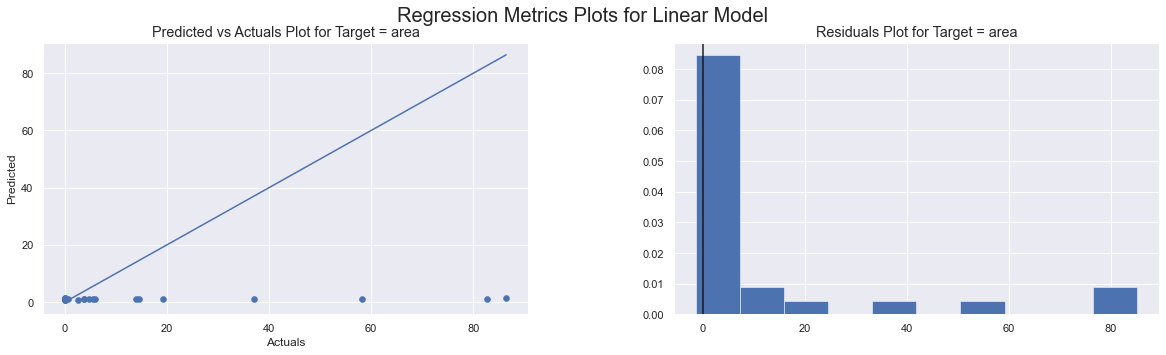

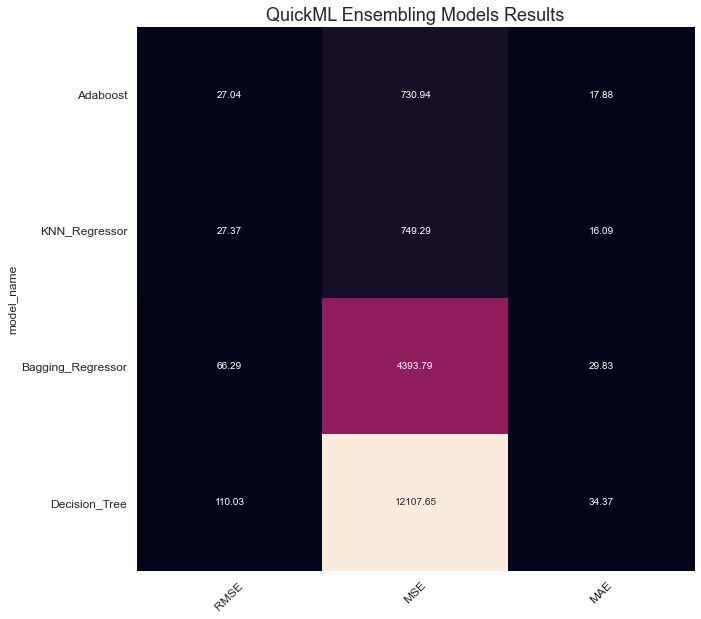

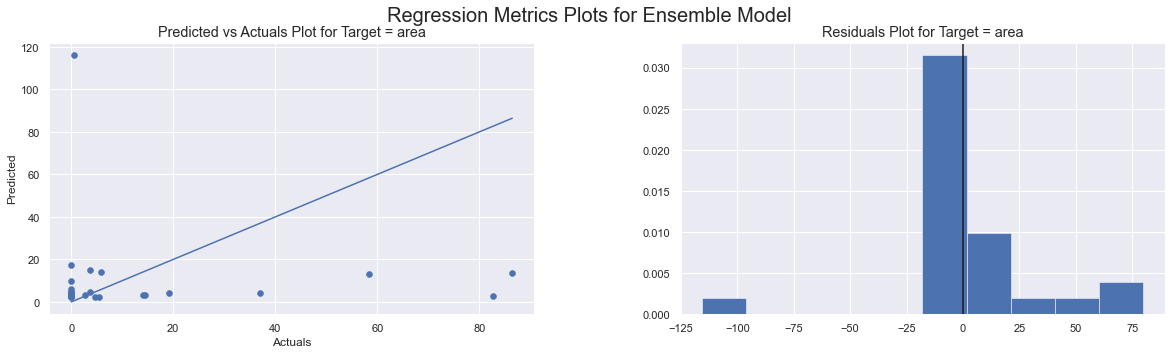

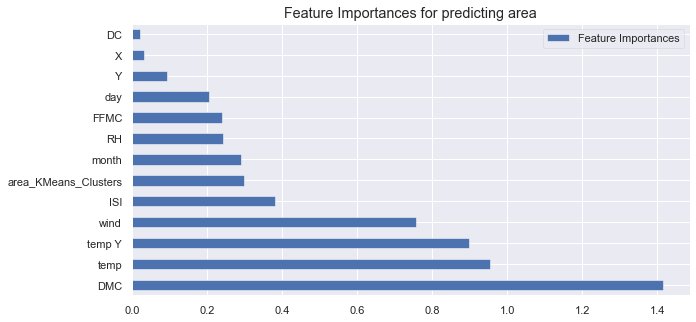

In [12]:
target = "area"

from autoviml.Auto_ViML import Auto_ViML
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='RS',
    feature_reduction=True,
    scoring_parameter='',
    Boosting_Flag=None,
    KMeans_Featurizer=True,
    Add_Poly=3,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

In [42]:
pred = pd.read_csv("./area/area_Regression_submission.csv").values
submit = pd.read_csv("./sample_submit.csv",header=None)
submit.iloc[:,1] = pred

In [44]:
submit.to_csv("submit.csv",header=None,index=None)

# データの取得

公式ページ：https://signate.jp/competitions/105

In [3]:
import pandas as pd
train = pd.read_csv("./train.tsv",sep="\t")
train = train.iloc[:,1:]
train

,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,y,n,f,f,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,d
1,p,f,y,y,f,f,f,c,b,p,e,b,k,k,b,p,p,w,o,l,h,y,g
2,e,b,y,w,t,l,f,c,b,k,e,c,s,s,w,w,p,w,o,p,k,n,m
3,p,x,s,b,t,f,f,c,b,h,t,b,s,s,w,w,p,w,o,p,h,v,u
4,p,x,s,w,t,f,f,c,b,w,t,b,s,f,w,w,p,w,o,p,h,v,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,p,f,y,n,f,s,f,c,n,b,t,?,k,k,p,p,p,w,o,e,w,v,p
4058,p,x,f,y,f,f,f,c,b,g,e,b,k,k,b,b,p,w,o,l,h,v,p
4059,p,k,y,n,f,y,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,d
4060,p,x,s,n,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,u


In [4]:
test = pd.read_csv("./test.tsv",sep="\t")
test = test.iloc[:,1:]
test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,w,t,f,f,c,b,p,t,b,f,f,w,w,p,w,o,p,h,v,g
1,f,y,g,t,n,f,c,b,n,t,b,s,s,p,g,p,w,o,p,n,y,d
2,x,y,e,t,n,f,c,b,w,t,b,s,s,w,p,p,w,o,p,n,y,d
3,f,s,g,t,f,f,c,b,p,t,b,f,s,w,w,p,w,o,p,h,v,g
4,x,s,e,f,y,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,b,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,n,o,p,y,c,l
4058,f,s,g,f,n,f,w,b,h,t,e,s,f,w,w,p,w,o,e,n,s,g
4059,x,f,g,t,n,f,c,b,w,t,b,s,s,g,w,p,w,o,p,k,v,d
4060,f,s,g,t,f,f,c,b,w,t,b,s,s,w,w,p,w,o,p,h,s,g


# モデルの作成と予測結果の提出

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (4062, 23)
    Training Set Memory Usage = 0.71 MB
Test Set Shape = (4062, 22)
    Test Set Memory Usage = 0.68 MB
Single_Label Target: ['Y']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           e:    2103  ->   51.8%
           p:    1959  ->   48.2%
String or Multi Class target: Y transformed as follows: {'e': 0, 'p': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    22 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables

    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND 

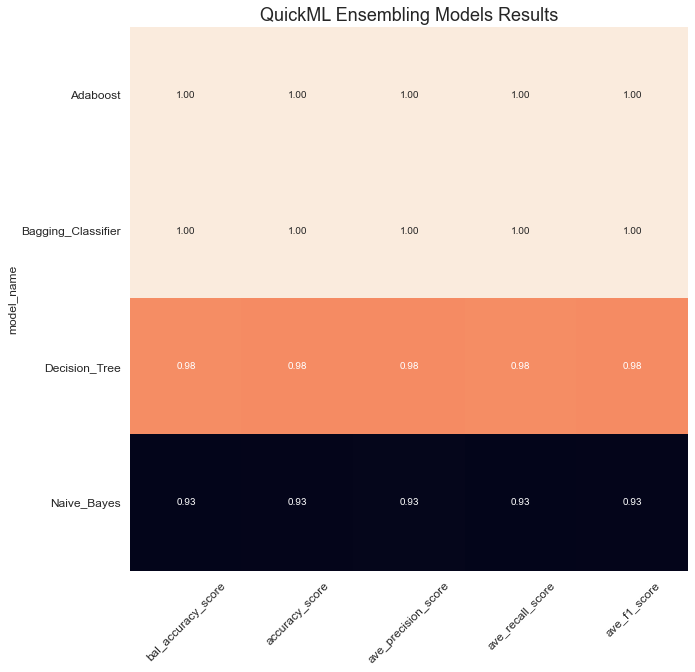

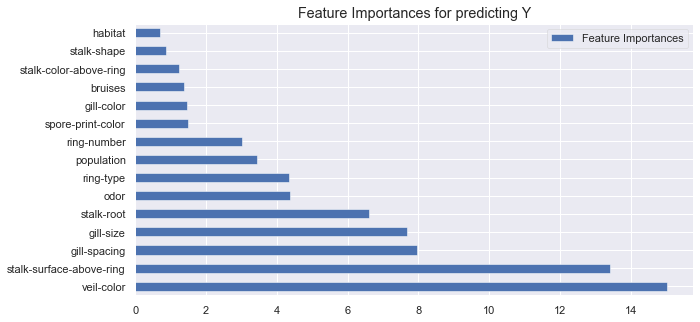

In [5]:
target = "Y"

from autoviml.Auto_ViML import Auto_ViML
model,features,train_modified,test_modified = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param='RS',
    feature_reduction=True,
    scoring_parameter='',
    Boosting_Flag=None,
    KMeans_Featurizer=True,
    Add_Poly=3,
    Stacking_Flag=False,
    Binning_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)

In [6]:
pred = pd.read_csv("./Y/Y_Binary_Classification_submission.csv").values
submit = pd.read_csv("./sample_submit.csv",header=None)
submit.iloc[:,1] = pred

In [8]:
submit.to_csv("submit.csv",header=None,index=None)